In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


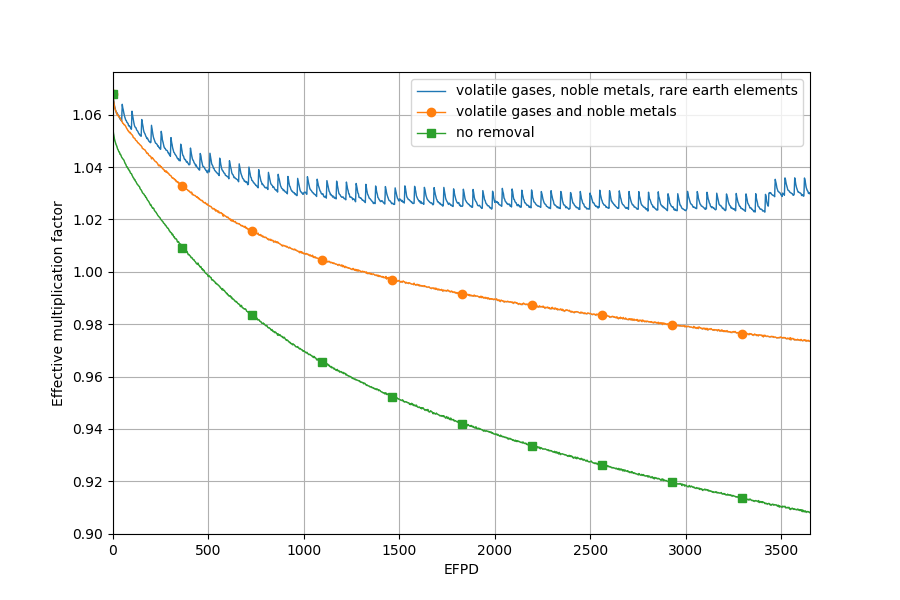

639.5101547241211


In [27]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
from pyne import data as d
from pyne import nucname
import h5py
import itertools
markers=itertools.cycle(('o','v','^','<','>','s','p','P','*','h','H','+','x','X','D','d','|','_'))
def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final
f_all = h5py.File('/home/andrei2/Desktop/git/MScThesis-MSBR/serpent/various_removal_cases/higher_tol_all_rems/db_saltproc.hdf5', 'r')
f_vg  = h5py.File('/home/andrei2/Desktop/git/MScThesis-MSBR/serpent/various_removal_cases/vol_gases_noble_rem/db_saltproc.hdf5', 'r')
f_no  = h5py.File('/home/andrei2/Desktop/git/MScThesis-MSBR/serpent/various_removal_cases/no_rems/db_saltproc.hdf5', 'r')
boc_keff_all  = f_all['keff_BOC'][0]
eoc_keff_all  = f_all['keff_EOC'][0]
keff_err_all  = (f_all['keff_BOC'][1] + f_all['keff_EOC'][1])/2
boc_keff_vg   = f_vg ['keff_BOC'][0]
eoc_keff_vg   = f_vg ['keff_EOC'][0]
keff_err_vg   = (f_vg['keff_BOC'][1] + f_vg['keff_EOC'][1])/2
boc_keff_no   = f_no ['keff_BOC'][0]
eoc_keff_no   = f_no ['keff_EOC'][0]
keff_err_no   = (f_no['keff_BOC'][1] + f_no['keff_EOC'][1])/2

step = 3 # days
#EOC = # Manually specify time period
EOS     = step*len(boc_keff_no)
EOS_all = step*len(boc_keff_all)
#days = np.arange(0,EOS,step)
days = np.arange(0,61.88907,0.008219)


# Initialize figure
fig_keff_1 = matplotlib.pyplot.figure(1, figsize=[9,6])
ax = fig_keff_1.add_subplot(111)
ax.grid(True)
#ax.plot(days, (boc_imp_keff+eoc_imp_keff)/2, '-', color='blue', label='K$_{eff}$', linewidth=0.5)
ax.plot(np.arange(0,EOS_all,step),(boc_keff_all +eoc_keff_all)/2, '-', 
        label='volatile gases, noble metals, rare earth elements', linewidth=1)
ax.plot(np.arange(0,EOS,step), (boc_keff_vg+eoc_keff_vg)/2, '-', 
        label='volatile gases and noble metals', linewidth=1, marker='o', markevery=122)
ax.plot(np.arange(0,EOS,step), (boc_keff_no+eoc_keff_no)/2, '-', 
        label='no removal', linewidth=1,  marker='s', markevery=122)

ax.fill_between(np.arange(0,EOS,step), (boc_keff_no+eoc_keff_no)/2-keff_err_no, 
                (boc_keff_no +eoc_keff_no)/2 +keff_err_no,alpha=1,edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax.fill_between(np.arange(0,EOS,step), (boc_keff_vg+eoc_keff_vg)/2-keff_err_vg,
                (boc_keff_vg+eoc_keff_vg)/2 +keff_err_vg,alpha=1, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax.fill_between(np.arange(0,EOS_all,step), (boc_keff_all+eoc_keff_all)/2-keff_err_all,
                (boc_keff_all+eoc_keff_all)/2 +keff_err_all,alpha=1, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
#ax.axvspan(6000, 6810, alpha=0.5, color='blue')
ax.legend(loc=0)
ax.set_ylabel('Effective multiplication factor')
ax.set_xlabel('EFPD')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim([5830,5850])
ax.set_xlim([0,365*10])
#ax.set_ylim([1.05, 1.06])
fig_keff_1.show()
#fig_keff_1.savefig('../../../saltproc/examples/gallery/full_core/keff.png',bbox_inches='tight', dpi=700)
#fig_keff_1.savefig('/home/andrei2/Desktop/git/publications/msbr-reproc/figures/keff_rem_cases.png',bbox_inches='tight', dpi=700)

print ( ((boc_keff_all[51]+eoc_keff_all[51])/2 - (boc_keff_all[50]+eoc_keff_all[50])/2 )*1e5  ) 